<a href="https://colab.research.google.com/github/KimJisanER/LAIDD/blob/main/insilico_synthesis_%EB%B0%B0%ED%8F%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 461 kB/s 


In [2]:
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 5 가지 building block을 미리 정의함.
# MolFromSmiles 함수는 SMILES 코드를 string으로 입력받아 RDkit MOL 형식으로 변환)

ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

In [5]:
# MOL 형식은 print 구문으로 구조로 확인할 수 없음

print(ethanol)

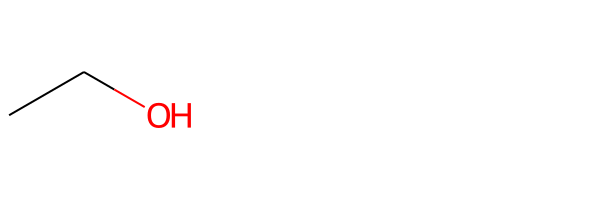

In [6]:
# MolsToGridImage 함수를 통해 구조 확인 가능. List 입력을 받으므로 주의

Draw.MolsToGridImage([ethanol])

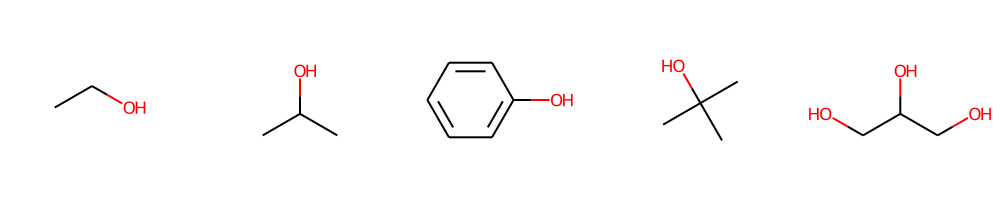

In [7]:
# 한 번에 여러 구조 출력 가능

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]
Draw.MolsToGridImage(alcohols, molsPerRow=5)

# 단일 화합물 입력 -> 단일 화합물 생성

In [8]:
# Reaction template을 SMART 포맷으로 지정

rxn_1 = AllChem.ReactionFromSmarts('[#6:1][O:2]>>[#6:1]=[O:2]')

# 아무 carbon을 1번 atom으로 지정한 뒤 single bond된 산소 원자를 2번 atom으로 지정
# C 와 O 사이의 single bond 를 double bond 로 변환

In [9]:
# isopropanol 에 해당 반응을 가하면 acetone 이 된다.

isopropanol_products = rxn_1.RunReactants((isopropanol,))

# RunReactants 에 tuple을 입력하는 이유는 어떤 반응은 여러 물질을 동시에 필요로 하기 때문

In [10]:
# RunReactants 함수의 결과물은 두 개의 tuple 안에 저장된다.

print(isopropanol_products)

# Outer tuple 은 합성이 일어나는 위치에 따라 달라지는 합성의 경우의 수이다
# Inner tuple 은 합성의 결과 여러 물질이 발생할 수 있기 때문에 존재한다.

((<rdkit.Chem.rdchem.Mol object at 0x7f9b00f66570>,),)


In [11]:
# 단, 이번 예시의 경우 합성이 한 곳에서만 일어나며, 단일 결과물이 도출되므로

acetone = isopropanol_products[0][0]

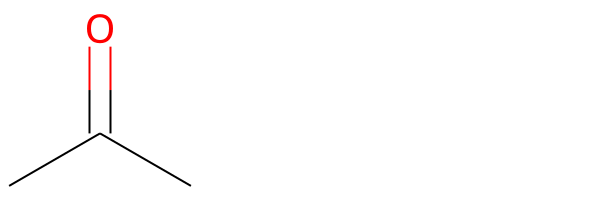

In [12]:
Draw.MolsToGridImage([acetone])

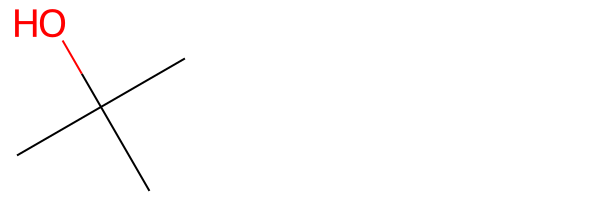

In [22]:
# 한편, 실제로는 일어날 수 없는 반응도 있을 수 있다.
# t-butanol 에 같은 합성 반응을 해보자

product = rxn_1.RunReactants((t_butanol, ))[0][0]
Draw.MolsToGridImage([t_butanol])

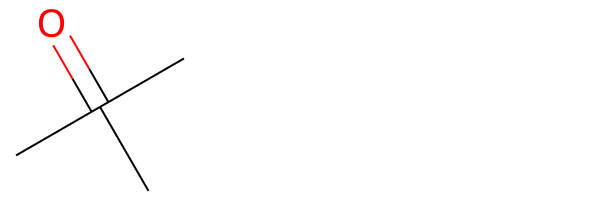

In [14]:
# 합성 결과물(product)는 하나의 탄소 원자의 결합 개수가 4개를 넘어가므로 존재할 수 없는 구조

Draw.MolsToGridImage([product])

In [15]:
# 결과물에 SanitizeMol 을 실행시켰을 때 ValueError가 발생한다면 실제로는 있을 수 없는 구조이다.
# try-except 구문을 통해 합성 결과물을 체크해 볼 수 있다.

try:
    Chem.SanitizeMol(product)
except ValueError:
    # Error 로그 출력을 통해 실패 원인을 분석할 수 있다.
    print("Sanitization failed")

Sanitization failed


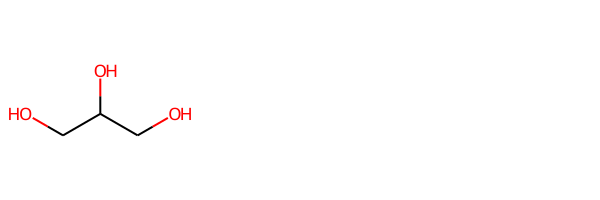

In [16]:
# Glycerol의 경우 해당 반응식으로 다양한 합성이 있을 수 있다.

glycerol_products = rxn_1.RunReactants((glycerol, ))
Draw.MolsToGridImage([glycerol])

In [17]:
# RunReactants 의 결과물의 길이를 재서 합성의 경우의 수를 확인 가능하다.

len(glycerol_products)

3

In [18]:
# 합성 방식에 따라 Sanitization check 를 각각 해줘야 한다.

sanitized_products = []  # 이 list에 통과한 합성 결과물만 모은다.
for products in glycerol_products:  # 각 합성 방식에 대해
    try:
        # 만약 합성 결과물 중 어느 하나라도 문제가 있다면 예외처리 된다.
        [Chem.SanitizeMol(mol) for mol in products]
        # 통과한 합성 결과만 리스트로 저장해 준다.
        sanitized_products.append(list(products))
    except ValueError:
        print("Sanitization failed")

print(sanitized_products)

[[<rdkit.Chem.rdchem.Mol object at 0x7f9b00f54e70>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b00f54f90>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b00f54ed0>]]


[<rdkit.Chem.rdchem.Mol object at 0x7f9b00f54e70>, <rdkit.Chem.rdchem.Mol object at 0x7f9b00f54f90>, <rdkit.Chem.rdchem.Mol object at 0x7f9b00f54ed0>]


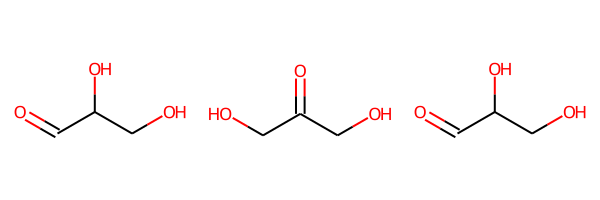

In [19]:
# 각 합성 방식의 결과물을 확인할 수 있다.

all_products = [mol[0] for mol in sanitized_products]  # 단일 리스트 형태로 변환
print(all_products)
Draw.MolsToGridImage(all_products)

# 사실 1번과 3번 화합물은 구조적으로 동일하다.

{'O=C(CO)CO', 'O=CC(O)CO'}
[<rdkit.Chem.rdchem.Mol object at 0x7f9b00f54e70>, <rdkit.Chem.rdchem.Mol object at 0x7f9b00f54f90>]


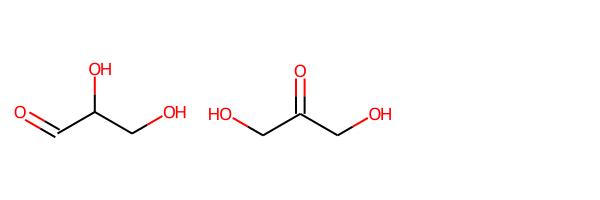

In [20]:
# 동일한 물질은 중복 제거하기 위해 set 과 SMILES 포맷을 활용

glycerol_unique_products = []  # unique MOL을 모으기 위한 리스트
glycerol_product_smiles = set()  # SMILES 중복을 확인하기 위한 set
for mol in all_products:
    smi = Chem.MolToSmiles(mol)
    if smi in glycerol_product_smiles:  # 중복일 경우 추가하지 않음
        continue
    glycerol_product_smiles.add(smi)
    glycerol_unique_products.append(mol)
print(glycerol_product_smiles)
print(glycerol_unique_products)
Draw.MolsToGridImage(glycerol_unique_products)

# 여러 화합물 동시에 시뮬레이션 하기

In [23]:
# 위 합성에서 조건을 좀 더 구체적으로 명시해 보자.
# Aliphatic carbon에 Hyrogen 이 붙은 경우에만 합성.

rxn_2 = AllChem.ReactionFromSmarts('[CH:1][O:2]>>[C:1]=[O:2]')

In [27]:
# 이번엔 모든 물질들에 대해 합성을 진행해 보자

# 화합물 이름을 key로, MOL 을 value로 갖는 dictionary를 정의
compound2mol = {
    'ethanol': Chem.MolFromSmiles('CCO'),
    'isopropanol': Chem.MolFromSmiles('CC(C)O'),
    'phenol': Chem.MolFromSmiles('c1cccc(O)c1'),
    't_butanol': Chem.MolFromSmiles('C(C)(C)(C)O'),
    'glycerol': Chem.MolFromSmiles('OCC(O)CO'),
}

compound2products = dict()  # 결과물을 저장하기 위한 dictionary
for compound in compound2mol:  # 각 화합물에 대한 합성 및 sanitization check
    mol = compound2mol[compound]
    sanitized_products = []

    all_products = rxn_2.RunReactants((mol,))
    for products in all_products:
        try:
            [Chem.SanitizeMol(mol) for mol in products]
            sanitized_products.append(list(products))
        except ValueError:
            print("Sanitization failed")

    compound2products[compound] = sanitized_products

print(compound2products)

# 실제로 합성이 된 경우는 두 가지 물질 뿐이다

{'ethanol': [], 'isopropanol': [[<rdkit.Chem.rdchem.Mol object at 0x7f9b00ea5450>]], 'phenol': [], 't_butanol': [], 'glycerol': [[<rdkit.Chem.rdchem.Mol object at 0x7f9b00ea5270>]]}


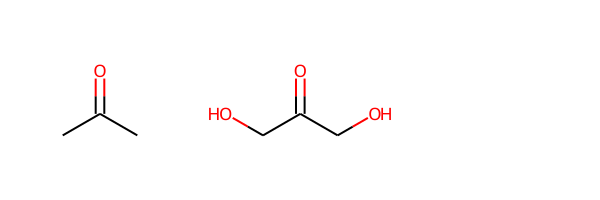

In [28]:
# 가능한 모든 합성 결과물을 출력해 보자

all_molecules = []
unique_smiles = set()
for compound in compound2products:
    products = compound2products[compound]
    if not products:  # skip if products are empty
        continue

    all_molecules += [mol[0] for mol in products]

Draw.MolsToGridImage(all_molecules)

# 합성 결과물이 여러 개 있는 경우

In [31]:
# 다음 SMART는 물질에서 탈수합성을 하는 과정을 나타낸다.
# 서로 다른 물질은 '.' 으로 구분. '>>' 후에 출력되는 물질은 2개
water_elimination_smarts = '[C!H0:1][C:2][O:3]>>[C:1]=[C:2].[O:3]'
water_elimination = AllChem.ReactionFromSmarts(water_elimination_smarts)

compound2products_we = dict()  # 결과물을 저장하기 위한 dictionary
for compound in compound2mol:  # 각 화합물에 대한 합성 및 sanitization check
    mol = compound2mol[compound]
    sanitized_products = []

    all_products = water_elimination.RunReactants((mol,))
    for products in all_products:
        try:
            [Chem.SanitizeMol(mol) for mol in products]
            sanitized_products.append(list(products))
        except ValueError:
            print("Sanitization failed")

    compound2products_we[compound] = sanitized_products #2. 어떤 변수가 입력되어야 하는가?

print(compound2products_we)

{'ethanol': [[<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d1b0>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d210>]], 'isopropanol': [[<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d2d0>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d450>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d4b0>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d510>]], 'phenol': [], 't_butanol': [[<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d570>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d5d0>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d630>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d690>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d6f0>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d750>]], 'glycerol': [[<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d7b0>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d810>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d870>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d8d0>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d930>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d990>], [<rdkit.C

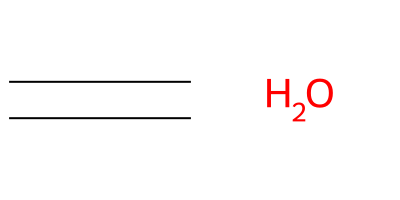

In [32]:
# ethanol의 결과
output_products = []
for outputs in compound2products_we['ethanol']:
    output_products += outputs

Draw.MolsToGridImage(output_products, molsPerRow=2)

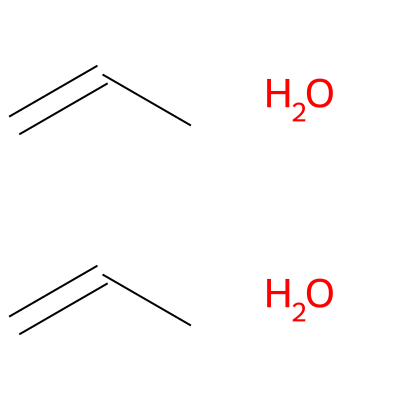

In [33]:
# isopropanol의 결과
output_products = []
for outputs in compound2products_we['isopropanol']:
    output_products += outputs
Draw.MolsToGridImage(output_products, molsPerRow=2)

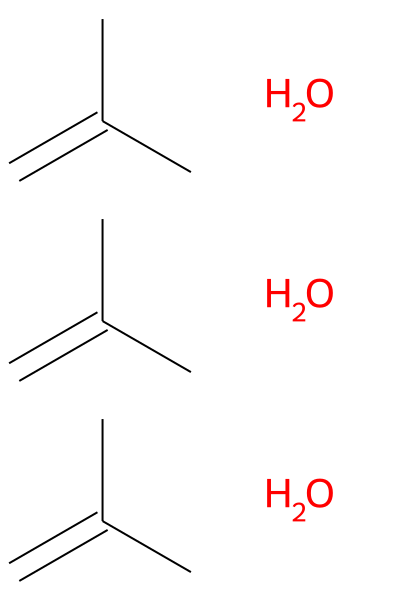

In [34]:
# t_butanol 의 결과
output_products = []
for outputs in compound2products_we['t_butanol']:
    output_products += outputs
Draw.MolsToGridImage(output_products, molsPerRow=2)

### Quiz: 합성 결과물이 여럿일 경우 중복 제거를 해보자
### Hint: SMILES 변환 이용

In [35]:
print(compound2products_we['t_butanol'])

[[<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d570>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d5d0>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d630>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d690>], [<rdkit.Chem.rdchem.Mol object at 0x7f9b0042d6f0>, <rdkit.Chem.rdchem.Mol object at 0x7f9b0042d750>]]


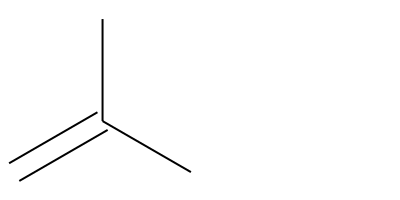

In [51]:
unique_products = []  # unique MOL을 모으기 위한 리스트
unique_smiles = set()  # smiles 코드가 unique 한지 체크하기 위한 set

#단일리스트로 변환 해주기
all_products = [mol[0] for mol in compound2products_we['t_butanol']]

for mol in all_products:
    # Quiz: fill out this area
    smi = Chem.MolToSmiles(mol)
    if smi in unique_smiles:  # 중복일 경우 추가하지 않음
        continue
    unique_smiles.add(smi)
    unique_products.append(mol)

Draw.MolsToGridImage(unique_products, molsPerRow=2)

In [52]:
compound2products_we['t_butanol']

[[<rdkit.Chem.rdchem.Mol at 0x7f9b0042d570>,

# 여러 화합물을 입력받는 경우

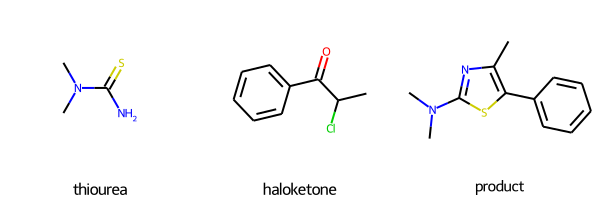

In [54]:
thiourea = Chem.MolFromSmiles('CN(C)C(=S)N')
haloketone = Chem.MolFromSmiles('c1ccccc1C(=O)C(C)Cl')

# SMART의 '.' 은 물질의 구분은 나타낸다. '>>' 앞에서 입력된 물질은 2개
rxn_smarts = '[NH2:1][C:2](=[S:3])[NH0:4].[C:5](=[O:6])[C:7][Cl:8]>>[N:4][c:2]1[s:3][c:5][c:7][n:1]1'
rxn_4 = AllChem.ReactionFromSmarts(rxn_smarts)#3 SMART를 변환시켜 reaction template으로 만들어 보자

product = rxn_4.RunReactants((thiourea, haloketone))[0][0]
Chem.SanitizeMol(product)

all_three = [thiourea, haloketone, product]
compound_names = ['thiourea', 'haloketone', 'product']
Draw.MolsToGridImage(all_three, legends=compound_names)

In [55]:
# 입력 화합물은 합성식의 순서대로 입력되어야 한다.

product = rxn_4.RunReactants((haloketone, thiourea))
print(product)

# thiourea과 haloketone의 순서가 바뀌면 결과물이 생성되지 않는다.

()
